# More Distributions and the Central Limit Theorem

## The normal distribution

### The normal distribution

The **normal distribution** is one of the most important probability distributions, since **many statistical methods rely on it** and **countless real-world situations can be modeled with it**. Its **shape** is commonly refered as **"bell curve"** and it's **symmetrical**. 

As with any **continuous distributions**, the **area** beneath the normal distribution curve is **equal to $1$**. This curve **never hits $0$**.

The normal distribution is **described by its mean and its standard deviation**.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

amir_deals = pd.read_csv('./data/amir_deals.csv', index_col=0)

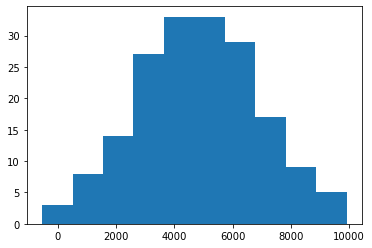

In [7]:
# Create a histogram with 10 bins to visualize the distribution of the amount columm of amir_deals
plt.hist(amir_deals['amount'])
plt.show()

#### The standard normal distribution

A normal distribution with **mean equals to $0$** and **standard deviation equals to $1$** is called a standard normal distribution. 

#### Areas under the normal distribution

For the normal distribution:

* $68\%$ of the area** is **within $1$ standard deviation** of the mean,
* $95\%$ of the area falls **within $2$ standard deviations** of the mean,
* and $97.5\%$ of the area is **within $3$ standard deviations** of the mean.

### Probabilities from a normal distribution

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the `amount` column of `amir_deals` and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars.

In [12]:
# What's the probability of Amir closing a deal worth less than $7500?
from scipy.stats import norm
prob_less_7500 = norm.cdf(7500, 5000, 2000)
prob_less_7500

0.8943502263331446

In [14]:
# What's the probability of Amir closing a deal worth more than $1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
prob_over_1000

0.9772498680518208

In [15]:
# What's the probability of Amir closing a deal worth between $3000 and $7000?
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
prob_3000_to_7000

0.6826894921370859

In [18]:
# What amount will 25% of Amir's sales be less than?
pct_25 = norm.ppf(0.25, 5000, 2000)
pct_25

3651.0204996078364

### Simulate values from a normal distribution

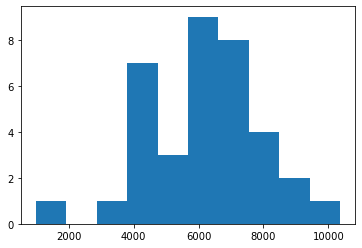

In [19]:
# Currently, Amir's average sale amount is $5000 
# Calculate what his new average amount will be if it increases by 20% and store this in new_mean
new_mean = 5000 + (5000 * 0.2)

# Amir's current standard deviation is $2000
# Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd
new_sd = 2000 + (2000 * 0.3)

# Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd
new_sales = norm.rvs(new_mean, new_sd, 36)

# Plot the distribution of the new_sales amounts using a histogram and show the plot
plt.hist(new_sales)
plt.show()

## The central limit theorem

## The Poisson distribution

## More probability distributions